Notebook from [Forecast Website Traffic Using Facebook's Prophet Library](http://pbpython.com/prophet-overview.html) 

Note: The recommended way to install prophet is to use the following command:

conda install -c conda-forge fbprophet

In [13]:
import pandas as pd
import numpy as np
import prophet
import matplotlib.pyplot as plt

ImportError: cannot import name 'prophet' from 'prophet' (c:\Users\npiku\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\__init__.py)

Use ggplot style for ascentic reasons

In [ ]:
%matplotlib inline
plt.style.use('ggplot')

Read in the data file and store as a pandas dataframe

In [ ]:
data_file = "https://github.com/chris1610/pbpython/blob/master/data/All-Web-Site-Data-Audience-Overview.xlsx?raw=True"
df = pd.read_excel(data_file)
df.head()

,Day Index,Sessions
0,2014-09-25,1
1,2014-09-26,4
2,2014-09-27,8
3,2014-09-28,42
4,2014-09-29,233


Check the data types to make sure the Day Index is a datetime type

In [ ]:
df.dtypes

Day Index    datetime64[ns]
Sessions              int64
dtype: object

Do a simple plot

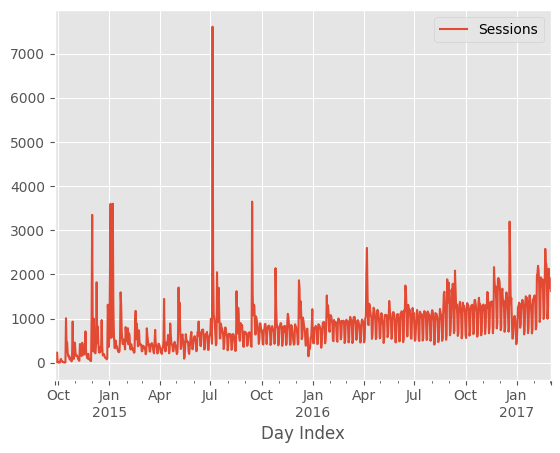

In [ ]:
df.set_index('Day Index').plot();

Filter out the outlier traffic spike

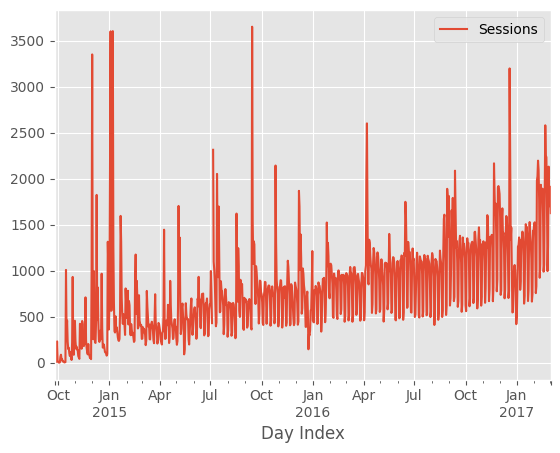

In [ ]:
df.loc[(df['Sessions'] > 5000), 'Sessions'] = np.nan
df.set_index('Day Index').plot();

More info on why we use log here - https://people.duke.edu/~rnau/411log.htm

In [ ]:
df['Sessions'] = np.log(df['Sessions'])
df.head()

,Day Index,Sessions
0,2014-09-25,0.000000
1,2014-09-26,1.386294
2,2014-09-27,2.079442
3,2014-09-28,3.737670
4,2014-09-29,5.451038


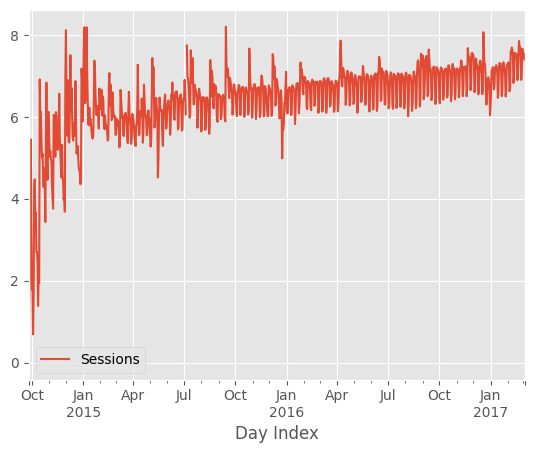

In [ ]:
df.set_index('Day Index').plot();

Rename the columns to comply with the prophet API

In [ ]:
df.columns = ["ds", "y"]
df.head()

,ds,y
0,2014-09-25,0.000000
1,2014-09-26,1.386294
2,2014-09-27,2.079442
3,2014-09-28,3.737670
4,2014-09-29,5.451038


Create a prophet object and fit it to our data

In [14]:

prophet.fit(df)

AttributeError: module 'prophet' has no attribute 'fit'

Create the future days we want to predict

In [ ]:
future1 = m1.make_future_dataframe(periods=365)
future1.tail()

,ds
1250,2018-02-27
1251,2018-02-28
1252,2018-03-01
1253,2018-03-02
1254,2018-03-03


Predict the future!

In [ ]:
forecast1 = m1.predict(future1)

Look at the values contained in the forecast dataframe

In [ ]:
forecast1.head()

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,2014-09-25,0.000000,3.664253,-0.012358,-0.012358,3.664253,3.664253,3.062057,4.292373,0.184423,0.184423,0.184423,-0.196780,-0.196780,-0.196780,-0.012358,3.651895
1,2014-09-26,0.001124,3.688755,-0.228551,-0.228551,3.688755,3.688755,2.841947,4.023345,0.000932,0.000932,0.000932,-0.229483,-0.229483,-0.229483,-0.228551,3.460204
2,2014-09-27,0.002247,3.713258,-0.780730,-0.780730,3.713258,3.713258,2.319354,3.564319,-0.520686,-0.520686,-0.520686,-0.260044,-0.260044,-0.260044,-0.780730,2.932528
3,2014-09-28,0.003371,3.737760,-0.673173,-0.673173,3.737760,3.737760,2.442374,3.660751,-0.385316,-0.385316,-0.385316,-0.287857,-0.287857,-0.287857,-0.673173,3.064587
4,2014-09-29,0.004494,3.762263,-0.028859,-0.028859,3.762263,3.762263,3.158738,4.331406,0.283490,0.283490,0.283490,-0.312349,-0.312349,-0.312349,-0.028859,3.733404


In [ ]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1250,2018-02-27,7.848040,6.569701,9.183382
1251,2018-02-28,7.787314,6.532167,9.077855
1252,2018-03-01,7.755146,6.538959,9.107978
1253,2018-03-02,7.552382,6.357826,8.845762
1254,2018-03-03,7.011651,5.742724,8.390236


In [ ]:
np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
1250,2560.709477,713.156765,9734.015115
1251,2409.836175,686.885011,8759.156056
1252,2333.549138,691.566553,9027.025287
1253,1905.275686,576.990613,6944.894977
1254,1109.484324,311.912946,4403.857201


Plot the forecast for the next year

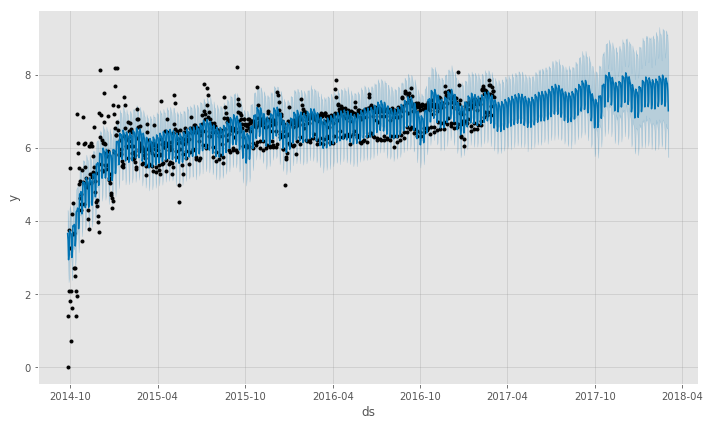

In [ ]:
m1.plot(forecast1);

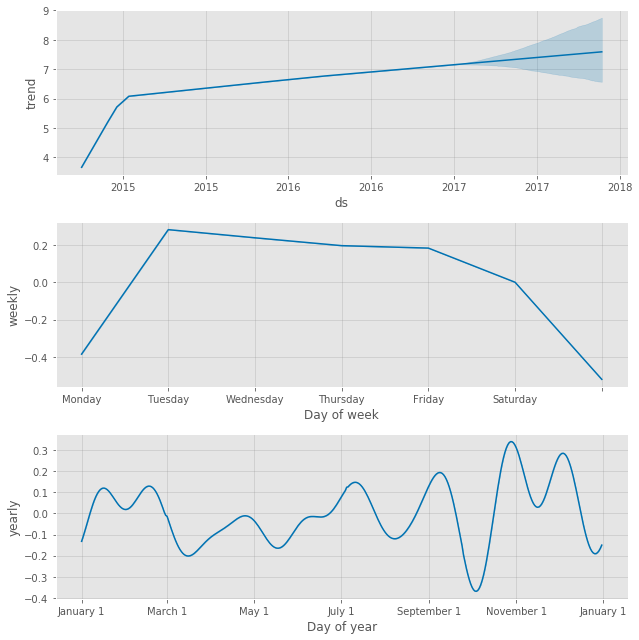

In [ ]:
m1.plot_components(forecast1);

Create a dataframe with all the blog posts as well as the new one happening on March 6th, 2017.

In [ ]:
articles = pd.DataFrame({
  'holiday': 'publish',
  'ds': pd.to_datetime(['2014-09-27', '2014-10-05', '2014-10-14', '2014-10-26', '2014-11-9', 
                        '2014-11-18', '2014-11-30', '2014-12-17', '2014-12-29', '2015-01-06',
                        '2015-01-20', '2015-02-02', '2015-02-16', '2015-03-23', '2015-04-08',
                        '2015-05-04', '2015-05-17', '2015-06-09', '2015-07-02', '2015-07-13',
                        '2015-08-17', '2015-09-14', '2015-10-26', '2015-12-07', '2015-12-30',
                        '2016-01-26', '2016-04-06', '2016-05-16', '2016-06-15', '2016-08-23',
                        '2016-08-29', '2016-09-06', '2016-11-21', '2016-12-19', '2017-01-17',
                        '2017-02-06', '2017-02-21', '2017-03-06']),
  'lower_window': 0,
  'upper_window': 5,
})

In [ ]:
articles.head()

,ds,holiday,lower_window,upper_window
0,2014-09-27,publish,0,5
1,2014-10-05,publish,0,5
2,2014-10-14,publish,0,5
3,2014-10-26,publish,0,5
4,2014-11-09,publish,0,5


Create a new model with the holidays defined

In [ ]:
m2 = Prophet(holidays=articles).fit(df)

In [ ]:
future2 = m2.make_future_dataframe(periods=90)

In [ ]:
forecast2 = m2.predict(future2)

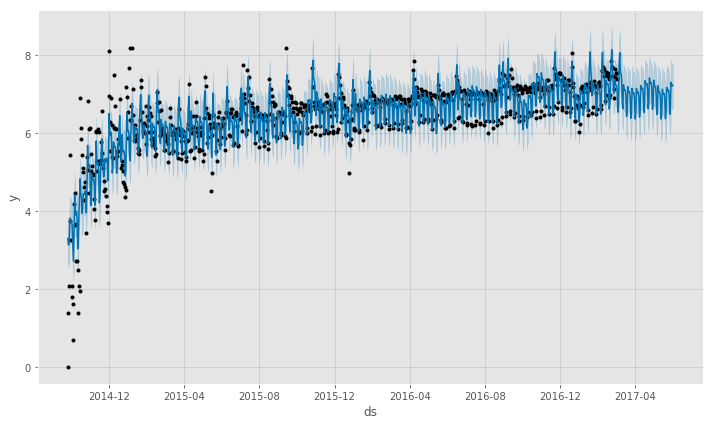

In [ ]:
m2.plot(forecast2);

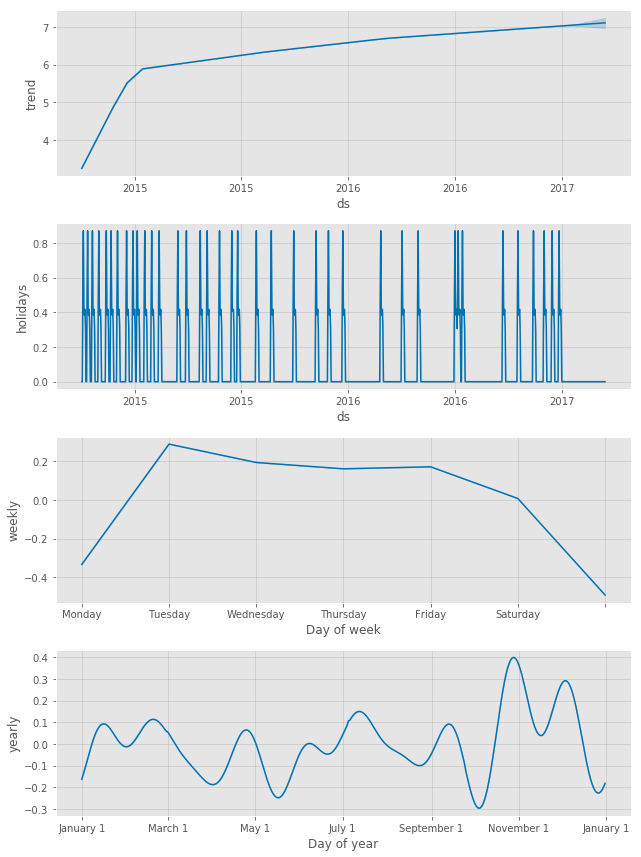

In [ ]:
m2.plot_components(forecast2);

Create the final model using holidays and applying some bayesian sampling to handle the errors with the holidays.
This will take a couple of minutes to run.

In [ ]:
m3 = Prophet(holidays=articles, mcmc_samples=500).fit(df)
future3 = m3.make_future_dataframe(periods=90)
forecast3 = m3.predict(future3)

Convert the log values back to the "real world" values.

In [ ]:
forecast3["Sessions"] = np.exp(forecast3.yhat).round()
forecast3["Sessions_lower"] = np.exp(forecast3.yhat_lower).round()
forecast3["Sessions_upper"] = np.exp(forecast3.yhat_upper).round()
forecast3[(forecast3.ds > "3-5-2017") & 
          (forecast3.ds < "4-1-2017")][["ds", "yhat", "Sessions_lower", "Sessions", "Sessions_upper"]]

,ds,yhat,Sessions_lower,Sessions,Sessions_upper
892,2017-03-06,7.846788,1387.0,2558.0,4578.0
893,2017-03-07,8.087021,1822.0,3252.0,5831.0
894,2017-03-08,7.584845,1138.0,1968.0,3403.0
895,2017-03-09,7.560417,1079.0,1921.0,3497.0
896,2017-03-10,7.422831,943.0,1674.0,2808.0
897,2017-03-11,6.795996,538.0,894.0,1566.0
898,2017-03-12,6.635982,435.0,762.0,1320.0
899,2017-03-13,7.246892,811.0,1404.0,2303.0
900,2017-03-14,7.146214,745.0,1269.0,2176.0
901,2017-03-15,7.107122,726.0,1221.0,2237.0


In [ ]:
forecast3.to_excel("March-2017-forecast.xlsx")